### Q3

#### (a)

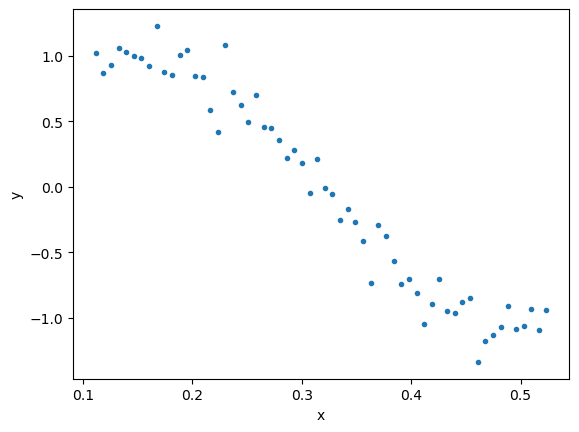

In [1]:
using PyPlot, CSV, DataFrames

data = CSV.read("lasso_data.csv", DataFrame)
x = data[:,1]
y = data[:,2]
plot(x, y, ".");
xlabel("x"); ylabel("y");
n=size(data, 1);

In [4]:
k=5 # degree of polynomial

n = length(x)
A = zeros(n, k+1)
for i = 1:n
    for j = 1:k+1
        A[i,j] = x[i]^(k+1-j)
    end
end

In [ ]:
using JuMP, Gurobi

m1 = Model(Gurobi.Optimizer)
set_optimizer_attribute(m1, "OutputFlag", 0);

@variable(m1, u[1:k+1])
@objective(m1, Min, sum((y-A*u).^2))

optimize!(m1)
u_opt = value.(u)
println(termination_status(m1))
println("optimal parameters for k=5 case:", value.(u))

In [ ]:
using PyPlot, LinearAlgebra

npts = 100
xfine = range(0, stop=0.5, length=npts) #0.6
ffine = ones(npts)

for j = 1:k
    ffine = [ffine.*xfine ones(npts)]
end

yfine = ffine * u_opt

plot(x,y,"b.")
plot(xfine,yfine,"r-")
grid()

In [ ]:
k=15 # degree of polynomial

n = length(x)
A = zeros(n, k+1)
for i = 1:n
    for j = 1:k+1
        A[i,j] = x[i]^(k+1-j)
    end
end

In [ ]:
using JuMP, Gurobi

m2 = Model(Gurobi.Optimizer)
set_optimizer_attribute(m1, "OutputFlag", 0);

@variable(m2, u[1:k+1])
@objective(m2, Min, sum((y-A*u).^2))

optimize!(m2)
u_opt = value.(u)
println(termination_status(m2))
println("optimal parameters for k=15 case:", value.(u))

In [ ]:
using PyPlot, LinearAlgebra

npts = 100
xfine = range(0, stop=0.5, length=npts) #0.6
ffine = ones(npts)

for j = 1:k
    ffine = [ffine.*xfine ones(npts)]
end

yfine = ffine * u_opt

plot(x,y,"b.")
plot(xfine,yfine,"r-")
grid()

The magnitudes of coefficients are large.

#### (b)

In [5]:
k = 15

n = length(x)
A = zeros(n, k+1)
for i = 1:n
    for j = 1:k+1
        A[i,j] = x[i]^(k+1-j)
    end
end

In [ ]:
using JuMP, Gurobi

lambda = 1/(10^6)

m3 = Model(Gurobi.Optimizer)
set_optimizer_attribute(m3, "OutputFlag", 0);

@variable(m3, u[1:k+1])
@objective(m3, Min, sum((y-A*u).^2) + lambda*sum(u.^2))

optimize!(m3)
u_opt = value.(u)
println(termination_status(m3))
println("Optimal parameters using ridge regression: ", value.(u))

In [ ]:
using PyPlot, LinearAlgebra

npts = 100
xfine = range(0, stop=0.5, length=npts) #0.6
ffine = ones(npts)

for j = 1:k
    ffine = [ffine.*xfine ones(npts)]
end

yfine = ffine * u_opt

plot(x, y, "b.")
plot(xfine,yfine,"r-")
grid()

The fit get worse compared to (a)

magnitudes of the coeﬃcients in this fitting gets smaller compared to (a)

#### (c)

In [6]:
k = 15

n = length(x)
A = zeros(n, k+1)
for i = 1:n
    for j = 1:k+1
        A[i,j] = x[i]^(k+1-j)
    end
end

In [ ]:
using JuMP, Gurobi


lambda_array = []
error_array = []
nonzero_array = []

for lambda in [10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]

    m4 = Model(Gurobi.Optimizer)
    set_optimizer_attribute(m4, "OutputFlag", 0);

    @variable(m4, t[1:k+1])
    @variable(m4, u[1:k+1])


    @constraint(m4, u .<= t)
    @constraint(m4, -t .<= u)

    @objective(m4, Min, sum((y-A*u).^2) + lambda*sum(t))

    optimize!(m4)
    u_opt = JuMP.value.(u)
    
    push!(lambda_array, lambda)   
    push!(error_array, objective_value(m4))

    nonezero_n = 0

    for i = 1:k+1
        if abs(uopt[i]) >= 1/(10^5)
            nonezero_n = 1 + nonezero_n
        end
    end
    
    push!(nonzero_array, nonezero_n)

end

In [ ]:
using PyPlot

plot(lambda_array, error_array,"r-")
xlabel("lambda")
ylabel("error")
grid()

In [ ]:
using PyPlot

plot(lambda_array, nonzero_array, "r-")
xlabel("lambda")
ylabel("nonzero_array")
grid()

The lambda fits the data relatively well is 0.001

In [7]:
k = 15

n = length(x)
A = zeros(n, k+1)
for i = 1:n
    for j = 1:k+1
        A[i,j] = x[i]^(k+1-j)
    end
end

In [ ]:
using JuMP, Gurobi

lambda = 0.001 

m5 = Model(Gurobi.Optimizer)
set_optimizer_attribute(m5, "OutputFlag", 0);


@variable(m5, t[1:k+1])
@variable(m5, u[1:k+1])

@constraint(m5, u .<= t)
@constraint(m5, -t .<= u)

@objective(m5, Min, sum((y-A*u).^2) + lambda*sum(t))

optimize!(m5)
u_opt = JuMP.value.(u)
println(termination_status(m5))
println("Optimal parameters for lambda=0.001: ", u_opt)

In [ ]:
using PyPlot, LinearAlgebra

npts = 100
xfine = range(0, stop=0.5, length=npts) #0.6
ffine = ones(npts)

for j = 1:k
    ffine = [ffine.*xfine ones(npts)]
end

yfine = ffine * u_opt

plot(x, y, "b.")
plot(xfine,yfine,"r-")
grid()